In [1]:
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
%matplotlib inline

c:\users\bigre\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [72]:
words = open('names.txt', 'r').read().splitlines()
WINDOW_SIZE = 3

In [3]:
len(words)

32033

In [4]:
# vocabulary of chars and mapping

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
# build dataset 

def build_dataset(words):
    window_size = 3 # context lenght
    X, Y = [], []
    for w in words:
        
        context = [0] * WINDOW_SIZE
        for char in w + '.':
            ix = stoi[char]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
        
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    
    return X, Y

In [8]:
import random 
random.seed(42)
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])


torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [11]:
X_train.shape, Y_train.shape

(torch.Size([182580, 3]), torch.Size([182580]))

In [56]:
gen = torch.Generator().manual_seed(228)
C = torch.randn((27,10), generator = gen)
W1 = torch.randn((30, 200), generator = gen)
b1 = torch.randn(200, generator = gen)
W2 = torch.randn((200, 27), generator = gen)
b2 = torch.randn((27), generator = gen)
parameters = [C, W1, b1, W2, b2]

In [57]:
sum(p.nelement() for p in parameters)

11897

In [58]:
for p in parameters:
    p.requires_grad = True

In [59]:
lre = torch.linspace(-3,0, 1000)
lrs = 10 ** lre

In [60]:
lri = []
lossi = []
step = []

In [65]:
for i in range(50000):
    # mini-batching
    ix = torch.randint(0, X_train.shape[0], (32,))
    
    # forward pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(-1,emb.shape[1] * emb.shape[2]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.01
    for p in parameters:
        p.data -= lr * p.grad 
        
    step.append(i)
    lossi.append(loss.log10().item())
    

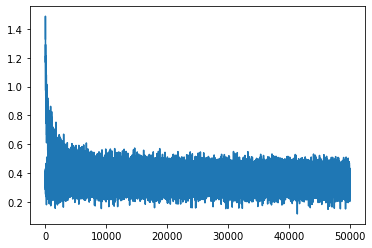

In [66]:
plt.plot(step, lossi)

In [67]:
emb = C[X_train]
h = torch.tanh(emb.view(-1, emb.shape[1] * emb.shape[2]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_train)

print(loss)

tensor(2.1834, grad_fn=<NllLossBackward0>)


In [68]:
emb = C[X_val]
h = torch.tanh(emb.view(-1, emb.shape[1] * emb.shape[2]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_val)

print(loss)

tensor(2.2137, grad_fn=<NllLossBackward0>)


In [76]:
# sampling from model
for _ in range(20):
    out = []
    context = [0] * WINDOW_SIZE
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples = 1, generator=gen).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
            
    print(''.join(itos[i] for i in out))

khesiope.
aamhton.
alyanellowan.
jaketh.
dumenley.
vihaudte.
mani.
oluwa.
dawlyn.
kailah.
jaykusnalee.
vellissious.
conealthan.
caydon.
ani.
ara.
gensi.
arsoniyah.
laell.
keisianalee.
